##### Simule el primer sistema cuántico descrito en la sección 4.1.

1. El sistema debe calcular la probabilidad de encontrarlo en una posición en particular.

Ejemplo caso de prueba para la simulacion 1 y 2


Número de posiciones: 3

Ingrese las amplitudes complejas para las 3 posiciones (Ejemplo de entrada: 1+0j).

Amplitud para la posición 0: 1+0j

Amplitud para la posición 1: 0+0j

Amplitud para la posición 2: 0+1j

Posición para calcular la probabilidad (0 a 2): 0

Probabilidad de encontrar la partícula en la posición 0: 1.000000 

¿Desea calcular la probabilidad de transición a otro estado? (s/n): s

Ingrese las amplitudes complejas para el nuevo estado de 3 posiciones (Ejemplo de entrada: 1+0j).

Amplitud para la posición 0: 0.5 + 0.5j

Amplitud para la posición 1: 0+0j

Amplitud para la posición 2: 0.5 + 0.5j

Probabilidad de transición al nuevo estado: 1.000000

In [1]:
import numpy as np

class SistemaCuantico:
    def _init_(self, numPosiciones):
        self.numPosiciones = numPosiciones
        self.estado = np.zeros(numPosiciones, dtype=complex)

    def asignarEstado(self, amplitudes): 
        if len(amplitudes) != self.numPosiciones:
            print("La longitud del vector de estado debe coincidir con el número de posiciones.")
        else:
            self.estado = np.array(amplitudes, dtype=complex)
    
    def probabilidad(self, posicion):
        if posicion < 0 or posicion >= self.numPosiciones:
            print("La posición está fuera de rango.")
            return None
        else:
            amplitud = self.estado[posicion]
            return np.abs(amplitud)**2

    def probabilidadTransicion(self, nuevoEstado):
        if len(nuevoEstado) != self.numPosiciones:
            print("La longitud del nuevo vector de estado debe coincidir con el número de posiciones.")
            return None
        else:
            superposicion = np.dot(np.conjugate(self.estado), nuevoEstado)
            return np.abs(superposicion)**2

def datos():
    numPosiciones = int(input("Número de posiciones: "))
    amplitudes = []
    print(f"Ingrese las amplitudes complejas para las {numPosiciones} posiciones (Ejemplo de entrada: 1+0j).")
    for i in range(numPosiciones):
        amplitud = complex(input(f"Amplitud para la posición {i}: "))
        amplitudes.append(amplitud)
    return numPosiciones, amplitudes

def nuevoEstado(numPosiciones):
    nuevoEstado = []
    print(f"Ingrese las amplitudes complejas para el nuevo estado de {numPosiciones} posiciones (Ejemplo de entrada: 1+0j).")
    for i in range(numPosiciones):
        amplitud = complex(input(f"Amplitud para la posición {i}: "))
        nuevoEstado.append(amplitud)
    return nuevoEstado

# Ejecutar el sistema
numPosiciones, amplitudes = datos()
sistema = SistemaCuantico(numPosiciones)
sistema.asignarEstado(amplitudes)

# Probabilidad de encontrar la partícula en una posición
posicion = int(input(f"Posición para calcular la probabilidad (0 a {numPosiciones - 1}): "))
probabilidad = sistema.probabilidad(posicion)
if probabilidad is not None:
    print(f"Probabilidad de encontrar la partícula en la posición {posicion}: {probabilidad:.6f} \n")

# Calcular la probabilidad de transición
calcularTransicion = input("¿Calcular la probabilidad de transición a otro estado? (s/n): ").lower()
if calcularTransicion == 's':
    nuevoEstado = nuevoEstado(numPosiciones)
    probabilidadTransicion = sistema.probabilidadTransicion(nuevoEstado)
    if probabilidadTransicion is not None:
        print(f"Probabilidad de transición al nuevo estado: {probabilidadTransicion:.6f}")

Ingrese las amplitudes complejas para las 3 posiciones (Ejemplo de entrada: 1+0j).


TypeError: SistemaCuantico() takes no arguments

2. El sistema si se le da otro vector Ket debe buscar la probabilidad de transitar del primer vector al segundo.

Probabilidad de colapso al estado |←>: 0.50
Probabilidad de colapso al estado |→>: 0.50


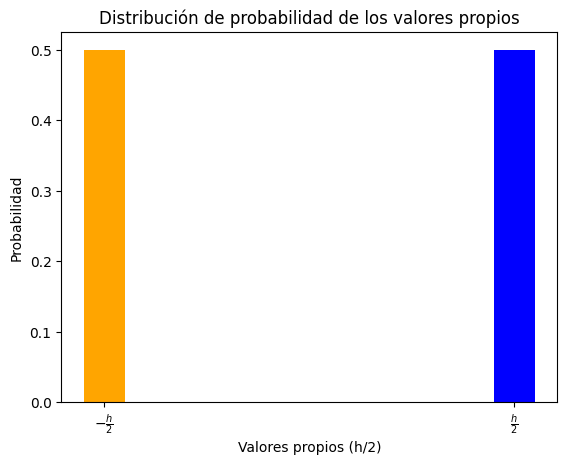

In [3]:
import numpy as np

up = np.array([[1], [0]])  # |up>
izq = (1/np.sqrt(2)) * np.array([[1], [1]])  # |izquierda>
der = (1/np.sqrt(2)) * np.array([[1], [-1]])  # |derecha>

# Probabilidad de colapso
def probabilidadColapso(estadoFin, estadoIni):
    superposicion = np.vdot(estadoFin, estadoIni)
    return np.abs(superposicion)**2

# Calculo probabilidades
PIzq= probabilidadColapso(izq, up)
PDer = probabilidadColapso(der, up)

print(f"Probabilidad de colapso al estado |←>: {PIzq:.2f}")
print(f"Probabilidad de colapso al estado |→>: {PDer:.2f}")
import numpy as np
import matplotlib.pyplot as plt
#4.3.2
up = np.array([[1], [0]])  # |up>
izq = (1/np.sqrt(2)) * np.array([[1], [1]])  # |izquierda>
der = (1/np.sqrt(2)) * np.array([[1], [-1]])  # |derecha>

# Valores propios correspondientes a los estados |right> y |left>
eigenvalues = [0.5, -0.5]  # hbar/2 y -hbar/2
probabilities = [probabilidadColapso(der, up), probabilidadColapso(izq, up)]  # Probabilidad de colapso a |right> y |left>

plt.bar(eigenvalues, probabilities, color=['blue', 'orange'], width=0.1)
plt.xlabel('Valores propios (h/2)')
plt.ylabel('Probabilidad')
plt.title('Distribución de probabilidad de los valores propios')
plt.xticks(eigenvalues, [r'$\frac{h}{2}$', r'$-\frac{h}{2}$'])
plt.show()

##### Complete los retos de programación del capítulo 4.

Para el desarrollo del taller usaremos la libreria numpy

1. Amplitud de transición. El sistema puede recibir dos vectores y calcular la probabilidad de transitar de el uno al otro después de hacer la observación

In [4]:
import numpy as np

#leemos los dos vectores
v1 = input("Introduce los elementos del vector uno (parte real y parte imaginaria separadas por coma, cada componente del vector separado por espacios")
elementosV1 = v1.split() 
vector1 = np.array([complex(float(e.split(',')[0]), float(e.split(',')[1])) for e in elementosV1])
v2 = input("Introduce los elementos del vector dos (parte real y parte imaginaria separadas por coma, cada componente del vector separado por espacios")
elementosV2 = v1.split()
vector2 = np.array([complex(float(e.split(',')[0]), float(e.split(',')[1])) for e in elementosV2])
#verificamos que los vectores esten normalizados
normaV1 = np.linalg.norm(vector1)
if(normaV1 != 1):
    vector1 = normaV1 * vector1
normaV2 = np.linalg.norm(vector2)
if(normaV2 != 1):
    vector2 = normaV2 * vector2
#realizamos el producto interno entre los 2 vectores
product = np.vdot(vector1,vector2)
probabilidad = abs(product)**2
print("la probabilidad de transicion es:" + str(probabilidad))

la probabilidad de transicion es:0.0


2.Ahora con una matriz que describa un observable y un vector ket, el sistema revisa que la matriz sea hermitiana, y si lo es, calcula la media y la varianza del observable en el estado dado.

In [5]:
import numpy as np
#lectura del vector y la matriz
v = input("Introduce los elementos del vector (parte real y parte imaginaria separadas por coma, , cada componente del vector separado por espacios")
elementosV = v.split() 
vector = np.array([complex(float(e.split(',')[0]), float(e.split(',')[1])) for e in elementosV])
n = len(vector)
print(f"Introduce los elementos de la matriz {n}x{n}, fila por fila, con cada elemento en el formato (parte real,parte imaginaria)")
matriz = []
for i in range(n):
    fila = input(f"Fila {i+1}: ").split()
    fila_complex = [complex(float(e.split(',')[0]), float(e.split(',')[1])) for e in fila]
    matriz.append(fila_complex)
matriz = np.array(matriz)
#normalizamos el vector
normaV1 = np.linalg.norm(vector)
if(normaV1 != 1):
    vector = normaV1 * vector
#verificar que la matriz sea hermitiana
is_hermitian = np.allclose(matriz, matriz.conj().T)
if(is_hermitian):
    #calculo de la media
    media = np.dot(vector,np.dot(matriz,vector))
    print("la media es:"+ str(media))
    #calculo de la varianza
    varianza = matriz - (media*np.identity(n))
    varianza = varianza * varianza
    total = np.dot(vector,np.dot(varianza,vector))
    print("la varianza es:" + str(total))
else:
    print("la matriz no es hermitiana")

Introduce los elementos de la matriz 0x0, fila por fila, con cada elemento en el formato (parte real,parte imaginaria)
la media es:[]
la varianza es:0.0


3. El sistema calcula los valores propios del observable y la probabilidad de que el sistema transite a alguno de los vectores propios después de la observación.

In [6]:
import numpy as np
from sys import stdin
#lectura del vector y la matriz
v = input("Introduce los elementos del vector (parte real y parte imaginaria separadas por coma, , cada componente del vector separado por espacios")
elementosV = v.split() 
vector = np.array([complex(float(e.split(',')[0]), float(e.split(',')[1])) for e in elementosV])
n = len(vector)
print(f"Introduce los elementos de la matriz {n}x{n}, fila por fila, con cada elemento en el formato (parte real,parte imaginaria)")
matriz = []
for i in range(n):
    fila = input(f"Fila {i+1}: ").split()
    fila_complex = [complex(float(e.split(',')[0]), float(e.split(',')[1])) for e in fila]
    matriz.append(fila_complex)
matriz = np.array(matriz)
#verificar que la matriz sea hermitiana
is_hermitian = np.allclose(matriz, matriz.conj().T)
if(is_hermitian):
    #calculamos los valores y vectore propios
    eigenvalues, eigenvectors = np.linalg.eig(matriz)
    print("vectores propios del observable:" + str(eigenvectors))
    #calculo de la probabilidad de que el sistema transite a alguno de los vectores
    probabilidad_total = 0
    for i in range(len(eigenvectors)):
        #verificar que el vector esta normalizado
        norma = np.linalg.norm(eigenvectors[i])
        if(normaV1 != 1):
            eigenvectors[i] = norma * eigenvectors[i]
            #calculo de la probabilidad
            probabilidad = pow(np.dot(eigenvectors[i],vector),2)
            print("la probabilidad del vector"+str(eigenvectors[i])+"es:"+str(probabilidad))
            probabilidad_total += probabilidad
    print("la suma de probabilidades es:"+str(probabilidad_total))
else:
    print("la matriz no es hermitiana")
    

Introduce los elementos de la matriz 0x0, fila por fila, con cada elemento en el formato (parte real,parte imaginaria)


LinAlgError: 1-dimensional array given. Array must be at least two-dimensional

4. Se considera la dinámica del sistema. Ahora con una serie de matrices Un el sistema calcula el estado final a partir de un estado inicial.

In [30]:
import numpy as np
from sys import stdin
#lectura del vector y la matriz
v = input("Introduce los elementos del vector (parte real y parte imaginaria separadas por coma, , cada componente del vector separado por espacios")
elementosV = v.split() 
vector = np.array([complex(float(e.split(',')[0]), float(e.split(',')[1])) for e in elementosV])
#lectura de n matrices unitarias dadas por el usuario
n = int(input("digite la cantidad de matrices unitarias"))
matricesUnitarias = []
m = len(vector)
# lectura de todas las matrices unitarias
for i in range(n):
    print(f"Introduce los elementos de la matriz {m}x{m}, fila por fila, con cada elemento en el formato (parte real,parte imaginaria)")
    matriz = []
    for j in range(m):
        fila = input(f"Fila {j+1}: ").split()
        fila_complex = [complex(float(e.split(',')[0]), float(e.split(',')[1])) for e in fila]
        matriz.append(fila_complex)
    matriz = np.array(matriz)
    matricesUnitarias.append(matriz)
estado_final = vector
#calculo del estado final
for U in matricesUnitarias:
    estado_final = np.dot(U,estado_final)
print("el estado final es")
print(estado_final)

Introduce los elementos de la matriz 2x2, fila por fila, con cada elemento en el formato (parte real,parte imaginaria)
Introduce los elementos de la matriz 2x2, fila por fila, con cada elemento en el formato (parte real,parte imaginaria)
el estado final es
[2.+0.j 0.+2.j]


##### Realice los siguientes problemas e incluyalos como ejemplos

4.3.1


In [2]:
import numpy as np
up = np.array([[1], [0]])  # |up>
izq = (1/np.sqrt(2)) * np.array([[1], [1]])  # |izquierda>
der = (1/np.sqrt(2)) * np.array([[1], [-1]])  # |derecha>

# Probabilidad de colapso
def probabilidadColapso(estadoFin, estadoIni):
    superposicion = np.vdot(estadoFin, estadoIni)
    return np.abs(superposicion)**2

# Calculo probabilidades
PIzq= probabilidadColapso(izq, up)
PDer = probabilidadColapso(der, up)

print(f"Probabilidad de colapso al estado |←>: {PIzq:.2f}")
print(f"Probabilidad de colapso al estado |→>: {PDer:.2f}")

Probabilidad de colapso al estado |←>: 0.50
Probabilidad de colapso al estado |→>: 0.50


4.3.2


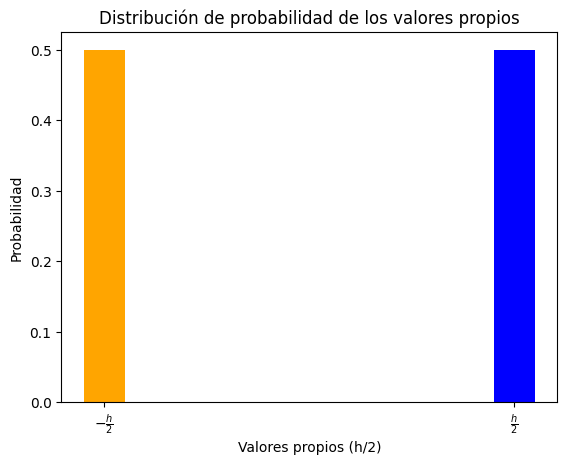

In [3]:
import numpy as np
import matplotlib.pyplot as plt
up = np.array([[1], [0]])  # |up>
izq = (1/np.sqrt(2)) * np.array([[1], [1]])  # |izquierda>
der = (1/np.sqrt(2)) * np.array([[1], [-1]])  # |derecha>

# Valores propios correspondientes a los estados |right> y |left>
eigenvalues = [0.5, -0.5]  # hbar/2 y -hbar/2
probabilities = [probabilidadColapso(der, up), probabilidadColapso(izq, up)]  # Probabilidad de colapso a |right> y |left>

plt.bar(eigenvalues, probabilities, color=['blue', 'orange'], width=0.1)
plt.xlabel('Valores propios (h/2)')
plt.ylabel('Probabilidad')
plt.title('Distribución de probabilidad de los valores propios')
plt.xticks(eigenvalues, [r'$\frac{h}{2}$', r'$-\frac{h}{2}$'])
plt.show()

4.4.1

In [ ]:
import numpy as np
# Matrices u1 y u2
u1 = np.array([[0, 1],
               [1, 0]])
u2 = np.array([[np.sqrt(2)/2, np.sqrt(2)/2],
               [np.sqrt(2)/2, -np.sqrt(2)/2]])

def esUnitaria(U):
    identidad = np.eye(U.shape[0])
    daga = np.conjugate(U.T)
    return np.allclose(U @ daga, identidad)

# Comprobar si U1 y U2 son matrices unitarias
u1Unitaria = esUnitaria(u1)
u2Unitaria = esUnitaria(u2)
# Comprobar si el producto entre u1 y u2 es unitario
u1u2Producto = np.dot(u1, u2)
productoUnitario = esUnitaria(u1u2Producto)

print("U1 es unitaria:", u1Unitaria)
print("U2 es unitaria:", u2Unitaria)
print("El producto U1*U2 es unitario:", productoUnitario)

4.4.2

In [ ]:
estadoIni = np.array([1, 0, 0, 0], dtype=complex)
U = np.array([[0, 1/np.sqrt(2), 1/np.sqrt(2), 0],
              [1j/np.sqrt(2), 0, 0, 1/np.sqrt(2)],
              [1/np.sqrt(2), 0, 0, 1j/np.sqrt(2)],
              [0, 1/np.sqrt(2), -1/np.sqrt(2), 0]], dtype=complex)

# Tres clicks
Click1 = np.dot(U, estadoIni)
Click2= np.dot(U, Click1)
Click3 = np.dot(U, Click2)

ProbabilidadPunto3 = np.abs(Click3[2])**2

print(f"Estado después de 3 clicks: {Click3:}\n")
print(f"Probabilidad de encontrar la partícula en el punto 3: {ProbabilidadPunto3}")